In [38]:
from sympy.physics.units import velocity

"""read_ros2_csv.py – pure‑Python helper to load and preview the CSV log
produced by your ROS 2 data logger.  **No ROS imports, no argparse, one file.**

Usage (command‑line):
    python read_ros2_csv.py                 # reads ~/ros2_logs/data_log.csv
    python read_ros2_csv.py path/to/file.csv

Usage (import):
    import read_ros2_csv as rc
    df = rc.load_ros2_csv()                 # default path
"""
from __future__ import annotations

import sys
from pathlib import Path
from typing import Optional

import pandas as pd

# Default location set by the logger script
DEFAULT_LOG_DIR = Path.home() / 'ros2_logs'
DEFAULT_FILE = DEFAULT_LOG_DIR / 'data_log.csv'

__all__ = ['load_ros2_csv']

def load_ros2_csv(file_path: Optional[str | Path] = None) -> pd.DataFrame:
    """Load the ROS 2 CSV log as a pandas DataFrame.

    Parameters
    ----------
    file_path : str | Path | None
        Path to a CSV file. If *None*, uses `~/ros2_logs/data_log.csv`.

    Returns
    -------
    pandas.DataFrame
        With `timestamp` parsed to `datetime64[ns]` and sorted ascending.
    """
    target = Path('data_log_20250724_150503.csv').expanduser() if file_path else DEFAULT_FILE
    if not target.exists():
        raise FileNotFoundError(f'{target} does not exist.')

    df = pd.read_csv(target, parse_dates=['timestamp'])
    df.sort_values('timestamp', inplace=True, ignore_index=True)
    return df


def _cli():
    """Simple command‑line interface (no argparse)."""
    file_arg = Path(sys.argv[1]) if len(sys.argv) > 1 else None
    try:
        df = load_ros2_csv(file_arg)
    except FileNotFoundError as exc:
        sys.exit(str(exc))

    start, end = df['timestamp'].iloc[[0, -1]]
    print(f'Loaded {len(df):,} rows spanning {start} → {end}\n')
    print(df.head())
    return df


In [39]:
data = _cli()


Loaded 16,446 rows spanning 2025-07-24 15:05:08.546000 → 2025-07-24 15:05:35.924000

                timestamp            topic     value
0 2025-07-24 15:05:08.546       position_x  0.870169
1 2025-07-24 15:05:08.547       position_y -0.059715
2 2025-07-24 15:05:08.548       velocity_x -0.010677
3 2025-07-24 15:05:08.549       velocity_y -0.174556
4 2025-07-24 15:05:08.549  control_force_x -3.200076


In [40]:
position_x = data[data['topic'] == 'position_x']
position_x_data = position_x['value'].values
position_y = data[data['topic'] == 'position_y']
position_y_data = position_y['value'].values
velocity_x = data[data['topic'] == 'velocity_x']
velocity_x_data = velocity_x['value'].values
velocity_y = data[data['topic'] == 'velocity_y']
velocity_y_data = velocity_y['value'].values
control_force_x = data[data['topic'] == 'control_force_x']
control_force_x = control_force_x['value'].values
control_force_y = data[data['topic'] == 'control_force_y']
control_force_y = control_force_y['value'].values

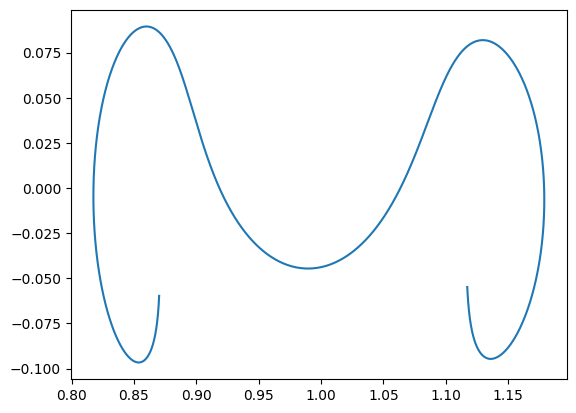

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(position_x_data, position_y_data)

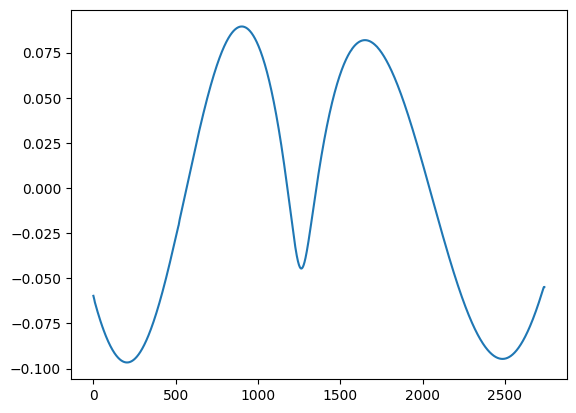

In [42]:
fig, ax = plt.subplots()
ax.plot(position_y_data)

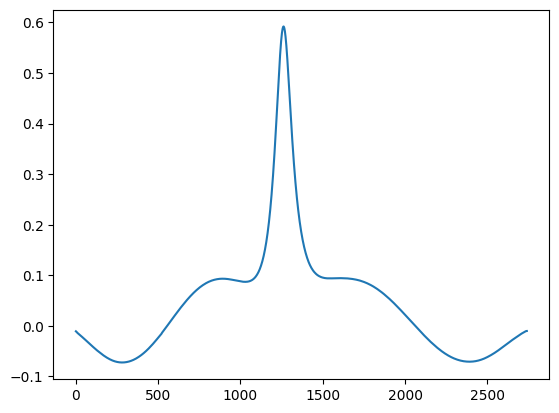

In [43]:
fig, ax = plt.subplots()
ax.plot(velocity_x_data)

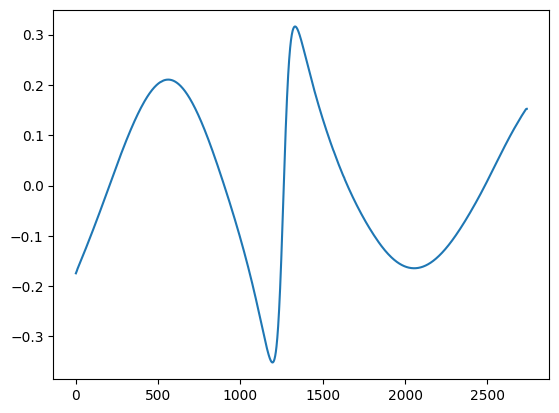

In [44]:
fig, ax = plt.subplots()
ax.plot(velocity_y_data)

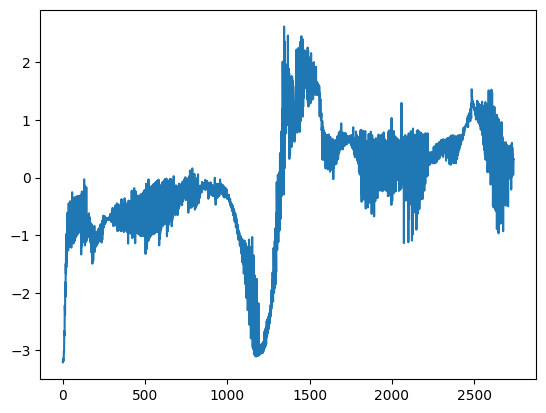

In [45]:
fig, ax = plt.subplots()
ax.plot(control_force_x)